In [14]:
# Import Necessary Modules
import glob
import matplotlib.pyplot as plt
import math
from skimage import io
import numpy as np
%matplotlib inline 

In [86]:
#This function reads in all images in catsfolder/ and dogsfolder/. 
#Each 64 x 64 image is reshaped into a length-4096 row vector. 
#These row vectors are stacked on top of one another to get two data
#matrices, each with 4096 columns, with cats first, then dogs.  The
#function outputs this data matrix, along with a vector containing a
#label for each data point, with 0 for cats and 1 for dogs. 

def read_cats_dogs():
    
    # get image filenames
    cat_locs = glob.glob('petdataset/catsfolder/*.jpg')
    dog_locs = glob.glob('petdataset/dogsfolder/*.jpg')

    cat_locs.sort()
    dog_locs.sort()

    num_cats = len(cat_locs)
    num_dogs = len(dog_locs)
    
    # initialize empty arrays
    cats = np.zeros((num_cats,64*64))
    dogs = np.zeros((num_dogs,64*64))
    im1 = np.zeros(64*64,)
              
    #reshape images into row vectors and stack into a matrix 
    for i in range(num_cats):
        img = cat_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        cats[i,:] = im

    for i in range(num_dogs):
        img = dog_locs[i]
        im = io.imread(img)
        im = im.reshape(64*64)
        dogs[i,:] = im
    n0,d0 = cats.shape
    n1,d1 = dogs.shape

    if (n0 == 0) or (n1 == 0):
        raise Exception("you did not read in any data. The catsfolder and/or dogsfolder are not in this folder")

    if (d0 != d1):
        raise Exception("dataset0 and dataset1 do not have the same number of columns.")
    
    datamatrix = np.vstack((cats,dogs))
    labelvector = np.concatenate((np.zeros(n0),np.ones(n1)))
    

    return datamatrix, labelvector

In [87]:
#This function takes in an n x 4096 data matrix X and an index i. It extracts
#the ith row of X and displays it as a grayscale 64 x 64 image.

# def show_image(X, i):
#     #select image
#     image = X[i,:]
#     #reshape make into a square
#     image = image.reshape((64,64))
#     #display the image
#     plt.imshow(image,'gray')
#     plt.axis('off')  # Hide axis labels
#     plt.show()
def show_image(image_data):
    # Check if image_data is a 1D array (vector), then reshape it into a 64x64 image
    if image_data.ndim == 1:
        image = image_data.reshape((64, 64))
    else:
        # If image_data is already a 2D array, no need to reshape
        image = image_data

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis labels
    plt.show()


In [88]:
#Read in pet classificaton data 
X,Y = read_cats_dogs()
n,d = X.shape
n1= Y.size

if (n != n1):
    raise Exception("Don't have same number of labels and data vectors")

#To speed up the script, load the cats and dogs dataset once.  Don't execute this cell every time. 

In [89]:
# 10.4(a)  Fill in this function

#This function takes in a data matrix X, corresponding vector 
#of labels Y, and a desired label. It outputs the the number 
#of samples with desiredlabel as n_label as well as the sample
#mean vector mu_label and sample covariance matrix sigma_label
#for the data in X whose labels in Y are equal to desired label.

# def labeled_mean_cov(X,Y,desiredlabel):
#     n,d = X.shape
#     n_label = n
#     mu_label = np.zeros(d)
#     sigma_label = np.zeros((d,d))
    
#     ## Your code here 
    
#     return n_label, mu_label, sigma_label

def labeled_mean_cov(X, Y, desired_label):
    # Select rows where the label matches desired_label
    labeled_rows = X[Y == desired_label]
    # Compute the number of samples with the desired label
    n_label = labeled_rows.shape[0]
    # Calculate the mean vector for the selected rows
    mu_label = np.mean(labeled_rows, axis=0)
    # Calculate the covariance matrix for the selected rows
    sigma_label = np.cov(labeled_rows.T)

    return n_label, mu_label, sigma_label



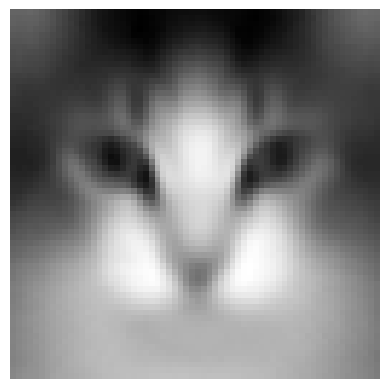

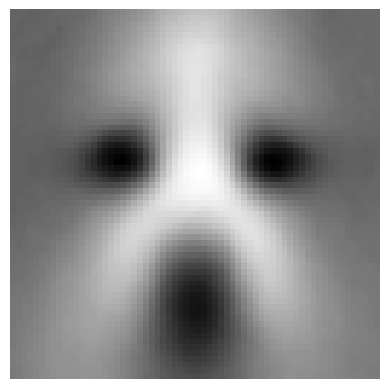

In [91]:
#10.4 (a)  Compute the average cat and get a picture, then compute the average and get a picture
# using the labeled_mean_cov function above.
# Compute the average cat image
n0, mu0, Sigma0 = labeled_mean_cov(X, Y, 0)
show_image(mu0)  # Display the average cat image

# Compute the average dog image
n1, mu1, Sigma1 = labeled_mean_cov(X, Y, 1)
show_image(mu1)  # Display the average dog image






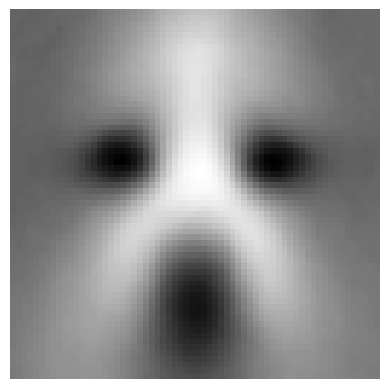

In [92]:
#10.4 (a)  Compute the average cat and get a picture, then compute the average dog and get a picture
# using the labeled_mean_cov function above.
# Compute the average dog image
n1, mu1, Sigma1 = labeled_mean_cov(X, Y, 1)

# Reshape the mu1 array into a row vector for printing
average_dog = np.reshape(mu1, (1, -1))

# Display the average dog image
show_image(mu1)


In [39]:
def error_rate(yguess,ytrue):
    if (yguess.shape == ytrue.shape):
        numguesses = yguess.size
    else:
        raise Exception("yguess and ytrue are not the same shape.  One may be a 1-D array, the other a 2-D array.")
    error_rate_value = 1/numguesses*np.sum(yguess != ytrue)
    return error_rate_value

In [45]:
# 10.4(b)  Extend the closest average function of HW 8 to take in a full data matrix X,
# with two averages, and classify each of the rows in this data matrix as 0 if mu0 is closer, 
# as 1 if mu1 is closer.  It outputs a vector guess contains the decision for each row of the data matrix.
# In the case of a tie, it outputs 1.
def closest_average(X, mu0, mu1):
    # Calculate distances.
    n, d = X.shape
    guess = np.zeros(n)
    
    for i in range(n):
        # Compute the distance from the i-th sample to each mean
        distance_to_mu0 = np.linalg.norm(X[i] - mu0)
        distance_to_mu1 = np.linalg.norm(X[i] - mu1)

        # Classify the sample based on the closest mean
        # If there's a tie, classify as 1 (dog)
        guess[i] = 0 if distance_to_mu0 < distance_to_mu1 else 1
    
    return guess


In [46]:
# 10.4(b) Compute the performance of the closest average classifier on the full data set

yguess = closest_average(X,mu0, mu1)
CAerrors = error_rate(yguess, Y)

print(f'Error rate for closest average classifier is {CAerrors}')


Error rate for closest average classifier is 0.197


In [93]:
#10.4 (c) Complete the dimensionality_reduction function to take in a data matrix
# DataMatrix, and a number k of desired reduced dimensions.  It outputs a reduced dimension
# data matrix, with features corresponding to the features along the k largest principal 
# components of the covariance of the original data matrix. It first computes the eigenvectors
# and eigenvalues of the covariance of the data matrix. It selects the k eigenvectors corresponding to 
# the k largest eigenvalues (the principal components), centers the data by subtracting mu, and projects
# the centered data to k dimensions by multiplying by the matrix
# of k eigenvectors.

# def dimensionality_reduction(Xrun,mu,V,D,k):
#     n,d = Xrun.shape
#     Xrun_reduced = np.zeros((n,k))

#     ## Your code here 

#     return Xrun_reduced

def dimensionality_reduction(Xrun, mu, V, D, k):
    # n is the number of samples, d is the number of dimensions
    n, d = Xrun.shape
    
    # Sort the eigenvectors by the eigenvalues in descending order
    sorted_indices = np.argsort(D)[::-1]
    V = V[:, sorted_indices]
    
    # Select the top k eigenvectors (principal components)
    V_k = V[:, :k]
    
    # Center the data by subtracting the mean
    X_centered = Xrun - mu
    
    # Project the centered data onto the k principal components
    Xrun_reduced = np.dot(X_centered, V_k)
    
    return Xrun_reduced


In [50]:
mu = np.mean(X,axis=0)
sigma = np.cov(X, rowvar=False)
#Determine eigenvalues and eigenvectors.
D, V = np.linalg.eigh(sigma) 
Xreduced = dimensionality_reduction(X,mu,V,D, 30)

In [95]:
#10.4 (d) This function takes in a data matrix Xrun as well the mean vectors mu0, mu1 
#and the covariance matrices sigma0, sigma1 estimated from the training data
#and produces a vector guesses, corresponding to the ML rule for Gaussian vectors
#with different means and the same covariance matrix, which is referred to as 
#Linear Discriminant Analysis (LDA) in machine learning.
def LDA(Xrun, mu0, mu1, sigmapooled):
    n, d = Xrun.shape
    guesses = np.zeros(n)
    
    # Compute the inverse of the pooled covariance matrix
    sigma_inv = np.linalg.inv(sigmapooled)
    
    # Compute the linear coefficients for the LDA decision boundary
    coefficients = np.dot(sigma_inv, mu1 - mu0)
    
    # Compute the constant term for the LDA decision boundary
    constant_term = -0.5 * np.dot(mu1.T, np.dot(sigma_inv, mu1)) + 0.5 * np.dot(mu0.T, np.dot(sigma_inv, mu0))
    
    # Compute the discriminant scores for each sample
    scores = np.dot(Xrun, coefficients) + constant_term
    
    # Classify samples
    guesses[scores >= 0] = 1
    
    return guesses


In [96]:
n0,mu0,sigma0 = labeled_mean_cov(Xreduced,Y,0)
n1,mu1,sigma1 = labeled_mean_cov(Xreduced,Y,1)
sigmapooled = (1/(n0+n1-2))*((n0-1)*sigma0 + (n1-1)*sigma1)
yguess = LDA(Xreduced,mu0,mu1,sigmapooled)

LDAerrors = error_rate(yguess, Y)

print(f'Error rate for LDA classifier with 30 features is {LDAerrors}')





Error rate for LDA classifier with 30 features is 0.10400000000000001


In [97]:
#10.4 (e) This function takes in a data matrix Xrun as well the mean vectors mu0, mu1 
#and the covariance matrices sigma0, sigma1 estimated from the training data
#and produces a vector guesses, corresponding to the ML rule for Gaussian vectors
#with different means and different covariance matrices, which is referred to as 
#Quadratic Discriminant Analysis (QDA) in machine learning.
def QDA(Xrun, mu0, mu1, sigma0, sigma1):
    n, d = Xrun.shape
    guesses = np.zeros(n)

    # Compute the inverse and log determinant for sigma0
    inv_sigma0 = np.linalg.inv(sigma0)
    sign0, logdet_sigma0 = np.linalg.slogdet(sigma0)
    
    # Compute the inverse and log determinant for sigma1
    inv_sigma1 = np.linalg.inv(sigma1)
    sign1, logdet_sigma1 = np.linalg.slogdet(sigma1)
    
    # Check for non-positive definite matrices
    if sign0 <= 0 or sign1 <= 0:
        raise ValueError("Non-positive definite covariance matrix.")

    for i in range(n):
    # Compute the quadratic terms for the discriminant functions
        diff0 = Xrun[i] - mu0
        diff1 = Xrun[i] - mu1
        term0 = np.dot(diff0.T, np.dot(inv_sigma0, diff0)) + logdet_sigma0
        term1 = np.dot(diff1.T, np.dot(inv_sigma1, diff1)) + logdet_sigma1

    # Assign class based on which term is smaller
        guesses[i] = 1 if term1 < term0 else 0
    
    return guesses

In [98]:
yguess = QDA(Xreduced,mu0,mu1,sigma0,sigma1)

QDAerrors = error_rate(yguess, Y)

print(f'Error rate for QDA classifier with 30 features is {QDAerrors}')
# Code to split and prepare the data, compute mu0, mu1, sigma0, sigma1, as per the given setup


Error rate for QDA classifier with 30 features is 0.043000000000000003


In [99]:
# 10.4(f)  This function takes in a data matrix Xrun as well a training data matrix Xtrain and
# the labels for the training data ytrain.  For each row of Xrun, it finds the closest row in Xtrain
# and assigns the label of that closest row as the guessed label for the row of Xtrain. 
def nearest_neighbor(Xrun, Xtrain, ytrain):
    n, d = Xrun.shape
    guesses = np.zeros(n)

    for i in range(n):
        # Calculate the distance from the i-th test sample to all training samples
        distances = np.linalg.norm(Xtrain - Xrun[i], axis=1)
        # Find the index of the closest training sample
        closest_index = np.argmin(distances)
        # Assign the label of the closest training sample to the guess
        guesses[i] = ytrain[closest_index]

    return guesses
 

In [100]:
n = Xreduced.shape[0]
permutation = np.random.permutation(n) # generates a permutation
Xshifted = Xreduced[permutation,:]
Yshifted = Y[permutation]

n1 = math.floor(0.8*n)

Xtrain = Xshifted[:n1,:]
Ytrain = Yshifted[:n1]
Xrun = Xshifted[n1:,:]
Yrun = Yshifted[n1:]
yguess = nearest_neighbor(Xrun,Xtrain,Ytrain)

NNerrors = error_rate(yguess, Yrun)

print(f'Error rate for NN classifier with 30 features is {QDAerrors}')

Error rate for NN classifier with 30 features is 0.043000000000000003


In [68]:
# 10.4 (g) -- Script for evaluationg overfitting
#Split the data into numfolds equal-sized segments
numfolds = 5 
#All but one fold used for training
trainfraction = (numfolds-1)/numfolds 

#Dimensions to try for PCA dimensionality reduction
kvalues = np.array([10, 25, 50, 100, 250, 500])
numkvalues = kvalues.size

#Initialize arrays to store error rate estimates.
train_error_NN = np.zeros((numfolds,numkvalues))
test_error_NN = np.zeros((numfolds,numkvalues))
train_error_LDA = np.zeros((numfolds,numkvalues))
test_error_LDA = np.zeros((numfolds,numkvalues))
train_error_QDA = np.zeros((numfolds,numkvalues))
test_error_QDA = np.zeros((numfolds,numkvalues))

train_error_CA = np.zeros((numfolds,numkvalues))
test_error_CA = np.zeros((numfolds,numkvalues))

# randomly permutation of the full data set: ge the indices 

n = X.shape[0]
np.random.seed(42)
permutation = np.random.permutation(n) 

In [69]:
#Loop over folds, using the mth fold for testing, remainder for training.
for m in range(numfolds):
    print("Fold " + str(m+1) + " out of " + str(numfolds) + ".")

   
    permshift = np.roll(permutation,math.floor(n*m/numfolds))
    dataperm = X[permshift,:]
    labelperm = Y[permshift]
    #Split dataset into training and test data.
    n1 = math.floor(n*trainfraction)
    Xtrain = dataperm[0:n1,:]
    Xtest = dataperm[n1:,:]
    Ytrain = labelperm[0:n1]
    Ytest = labelperm[n1:]

    ntrain = Xtrain.shape[0]
    ntest = Xtest.shape[0]

    #Compute covariance and PCA only once 
    mu = np.mean(X,axis=0)
    sigma = np.cov(Xtrain, rowvar=False)
    #Determine eigenvalues and eigenvectors.
    D, V = np.linalg.eigh(sigma) 
    
    #Loop over different sizes of dimension k for dimensionality reduction
    for j in range(numkvalues):
        k = kvalues[j] #Dimensionality reduction parameter.
        print(f"Trying dimension {k}.")
        #Reduce training and testing data to k dimensions.
        Xtrain_reduced = dimensionality_reduction(Xtrain,mu,V,D,k)
        Xtest_reduced = dimensionality_reduction(Xtest,mu,V,D,k)

        #Determine number of samples, mean vector, 
        #and covariance matrix for each label.
        n0train,mu0,sigma0 = labeled_mean_cov(Xtrain_reduced,Ytrain,0)
        n1train,mu1,sigma1 = labeled_mean_cov(Xtrain_reduced,Ytrain,1) 

        # Using the closest average classifier, produce guesses for the training and testing data.

        trainguesses_CA = closest_average(Xtrain_reduced,mu0,mu1)
        testguesses_CA = closest_average(Xtest_reduced,mu0,mu1)

        train_error_CA[m,j] = error_rate(trainguesses_CA,Ytrain)
        test_error_CA[m,j] = error_rate(testguesses_CA,Ytest)



        # #Using the NearestNeighbor classifier, produce guesses for the training and testing data.

        trainguesses_NN  = nearest_neighbor(Xtrain_reduced,Xtrain_reduced,Ytrain)
        testguesses_NN  = nearest_neighbor(Xtest_reduced,Xtrain_reduced,Ytrain)

        #  #Store resulting NN error rates.
        train_error_NN[m,j] = error_rate(trainguesses_NN,Ytrain)
        test_error_NN[m,j] = error_rate(testguesses_NN,Ytest)

        
        #Using the LDA algorithm, produce guesses for the training and testing data
        sigmapooled = 1/(n0train+n1train-2)*((n0train-1)*sigma0+(n1train-1)*sigma1)
        trainguesses_LDA = LDA(Xtrain_reduced,mu0,mu1,sigmapooled)
        testguesses_LDA = LDA(Xtest_reduced,mu0,mu1,sigmapooled)
        
        #Store resulting LDA error rates.
        train_error_LDA[m,j] = error_rate(trainguesses_LDA,Ytrain)
        test_error_LDA[m,j] = error_rate(testguesses_LDA,Ytest)
        
        # #Using the QDA algorithm, produce guesses for the training and testing data.
        trainguesses_QDA = QDA(Xtrain_reduced,mu0,mu1,sigma0,sigma1)
        testguesses_QDA = QDA(Xtest_reduced,mu0,mu1,sigma0,sigma1)
        
        # #Store resulting QDA error rates.
        train_error_QDA[m,j] = error_rate(trainguesses_QDA,Ytrain)
        test_error_QDA[m,j] = error_rate(testguesses_QDA,Ytest)

Fold 1 out of 5.
Trying dimension 10.
Trying dimension 25.
Trying dimension 50.
Trying dimension 100.
Trying dimension 250.
Trying dimension 500.
Fold 2 out of 5.
Trying dimension 10.
Trying dimension 25.
Trying dimension 50.
Trying dimension 100.
Trying dimension 250.
Trying dimension 500.
Fold 3 out of 5.
Trying dimension 10.
Trying dimension 25.
Trying dimension 50.
Trying dimension 100.
Trying dimension 250.
Trying dimension 500.
Fold 4 out of 5.
Trying dimension 10.
Trying dimension 25.
Trying dimension 50.
Trying dimension 100.
Trying dimension 250.
Trying dimension 500.
Fold 5 out of 5.
Trying dimension 10.
Trying dimension 25.
Trying dimension 50.
Trying dimension 100.
Trying dimension 250.
Trying dimension 500.


In [101]:
#Determine average error rates over folds.



avg_train_error_NN = np.mean(train_error_NN,axis=0)
avg_test_error_NN = np.mean(test_error_NN,axis=0)
avg_train_error_LDA = np.mean(train_error_LDA,axis=0)
avg_test_error_LDA = np.mean(test_error_LDA,axis=0)
avg_train_error_QDA = np.mean(train_error_QDA,axis=0)
avg_test_error_QDA = np.mean(test_error_QDA,axis=0)
avg_train_error_CA = np.mean(train_error_CA,axis=0)
avg_test_error_CA = np.mean(test_error_CA,axis=0)

print("Average training error for NN:", np.mean(train_error_NN, axis=0))
print("Average testing error for NN:", np.mean(test_error_NN, axis=0))
print("Average training error for LDA:", np.mean(train_error_LDA, axis=0))
print("Average testing error for LDA:", np.mean(test_error_LDA, axis=0))
print("Average training error for QDA:", np.mean(train_error_QDA, axis=0))
print("Average testing error for QDA:", np.mean(test_error_QDA, axis=0))
print("Average training error for CA:", np.mean(train_error_CA, axis=0))
print("Average testing error for CA:", np.mean(test_error_CA, axis=0))

Average training error for NN: [0. 0. 0. 0. 0. 0.]
Average testing error for NN: [0.144  0.129  0.1395 0.1525 0.165  0.1735]
Average training error for LDA: [0.142125 0.109375 0.076625 0.059375 0.04525  0.026875]
Average testing error for LDA: [0.143  0.1135 0.086  0.08   0.0825 0.101 ]
Average training error for QDA: [0.097    0.051625 0.034375 0.01775  0.004625 0.00075 ]
Average testing error for QDA: [0.106  0.063  0.0555 0.051  0.05   0.1   ]
Average training error for CA: [0.202125 0.195875 0.195125 0.195125 0.194875 0.194875]
Average testing error for CA: [0.205  0.199  0.1985 0.199  0.199  0.199 ]


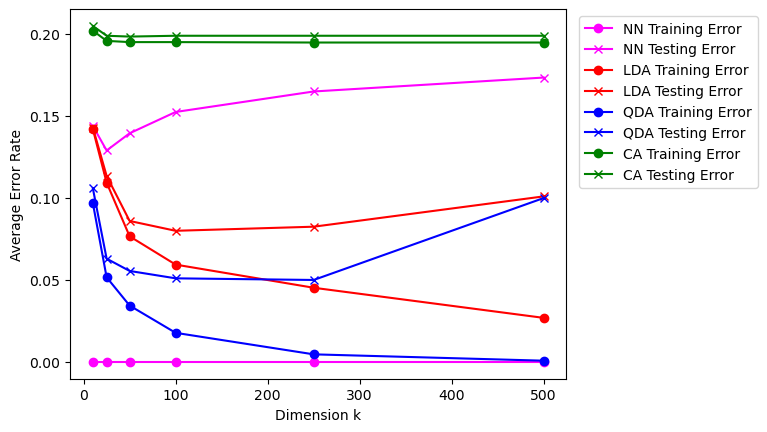

In [73]:
#Plot average error rates. 
fig = plt.figure()
plt.plot(kvalues,avg_train_error_NN,marker="o",color="magenta", label = 'NN Training Error')
plt.plot(kvalues,avg_test_error_NN,marker="x",color="magenta", label = 'NN Testing Error')
plt.plot(kvalues,avg_train_error_LDA,marker="o",color="red",label = 'LDA Training Error')
plt.plot(kvalues,avg_test_error_LDA,marker="x",color="red", label = 'LDA Testing Error')
plt.plot(kvalues,avg_train_error_QDA,marker="o",color="blue", label = 'QDA Training Error')
plt.plot(kvalues,avg_test_error_QDA,marker="x",color="blue", label = 'QDA Testing Error')
plt.plot(kvalues,avg_train_error_CA,marker="o",color="green", label = 'CA Training Error')
plt.plot(kvalues,avg_test_error_CA,marker="x",color="green", label = 'CA Testing Error')

plt.xlabel('Dimension k')
plt.ylabel('Average Error Rate')
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

# plt.legend(['NN Training Error', 'NN Testing Error', 'LDA Training Error','LDA Testing Error','QDA Training Error','QDA Testing Error'])

plt.savefig("HW10plot.png")
plt.show()

In [103]:
# Errors from each classifier
nn_training_errors = np.array([0., 0., 0., 0., 0., 0.])
nn_test_errors = np.array([0.144,  0.129,  0.1395, 0.1525, 0.165,  0.1735])
lda_training_errors = np.array([0.142125, 0.109375, 0.076625, 0.059375, 0.04525,  0.026875])
lda_test_errors = np.array([0.143,  0.1135, 0.086,  0.08,   0.0825, 0.101 ])

qda_training_errors = np.array([0.097,    0.051625, 0.034375, 0.01775,  0.004625, 0.00075 ])
qda_test_errors = np.array([0.106,  0.063,  0.0555, 0.051,  0.05,   0.1   ])
ca_training_errors = np.array([0.202125, 0.195875, 0.195125, 0.195125, 0.194875, 0.194875])
ca_test_errors = np.array ([0.205,  0.199,  0.1985, 0.199,  0.199,  0.199 ])

k_values = np.array([10, 25, 50, 100, 250, 500])

# Calculating the number of parameters for LDA and QDA
# LDA: 2k + k(k+1)/2, QDA: 2k + 2 * k(k+1)/2, CA: 2k, NN: k (not traditional parameters)
lda_params = 2 * k_values + (k_values * (k_values + 1)) / 2
qda_params = 2 * k_values + 2 * (k_values * (k_values + 1)) / 2
ca_params = 2 * k_values

# The optimal k for each classifier based on the test error
optimal_k_nn = k_values[np.argmin(nn_test_errors)]
optimal_k_lda = k_values[np.argmin(lda_test_errors)]
optimal_k_qda = k_values[np.argmin(qda_test_errors)]
optimal_k_ca = k_values[np.argmin(ca_test_errors)]

# The number of parameters for the optimal k
optimal_params_nn = nn_params[np.argmin(nn_test_errors)]
optimal_params_lda = lda_params[np.argmin(lda_test_errors)]
optimal_params_qda = qda_params[np.argmin(qda_test_errors)]
optimal_params_ca = ca_params[np.argmin(ca_test_errors)]

print(f"Optimal k values and parameters for each classifier:")
print(f"NN: k = {optimal_k_nn}, parameters = {optimal_params_nn}")
print(f"LDA: k = {optimal_k_lda}, parameters = {optimal_params_lda}")
print(f"QDA: k = {optimal_k_qda}, parameters = {optimal_params_qda}")
print(f"CA: k = {optimal_k_ca}, parameters = {optimal_params_ca}")

Optimal k values and parameters for each classifier:
NN: k = 25, parameters = 25
LDA: k = 100, parameters = 5250.0
QDA: k = 250, parameters = 63250.0
CA: k = 50, parameters = 100


In [ ]:
What happens to training error rate for the different algorithms as the dimension increases?
It decreases with an increase in dimensionality for all algorithms.

What happens to the test error rate as the dimension increases?
The test error rate decreases initially as k increases, reflecting improved model performance on
unseen data due to the capture of more relevant features in the dataset.

For each algorithm, estimate the number of parameters used as a function of k, and 
determine the value of k that yields the lowest test error. For instance,
the closest average classifier with k = 30 features has 60 parameters, corresponding to the specification of the two centers µ0, µ1.
Record the best values of k and the estimates of the parameters needed as a function of k for each of the algorithms.

Optimal k values and parameters for each classifier:
NN: k = 25, parameters = 25
LDA: k = 100, parameters = 5250.0
QDA: k = 250, parameters = 63250.0
CA: k = 50, parameters = 100